# Sheet 2: Solution

First, import a few commonly-used functions

In [26]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1: Bias-variance tradeoff for k-nearest-neighbors (knn) classifier

In [27]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
iris.head(8)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Divide the data set into train and test as done on exercise sheet 1.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]  # Features
y=iris['Species']  # Labels

# Normalise features
X_norm =normalize(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5) # 50% training and 50% test

After splitting, you will train the model on the training set.

In [29]:
#Import knn Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create a knn Classifier
acc_train = np.zeros(15)
acc_test = np.zeros(15)
for i,knn_neighbors in enumerate(np.arange(1,30,2)):
    knnmodel = KNeighborsClassifier(n_neighbors=knn_neighbors)
    knnmodel.fit(X_train, y_train) 
    print(y_train)
    acc_train[i] = accuracy_score(y_train,knnmodel.predict(X_train))
    acc_test[i]=accuracy_score(y_test,knnmodel.predict(X_test))

31         Iris-setosa
144     Iris-virginica
18         Iris-setosa
78     Iris-versicolor
33         Iris-setosa
10         Iris-setosa
141     Iris-virginica
146     Iris-virginica
60     Iris-versicolor
14         Iris-setosa
73     Iris-versicolor
48         Iris-setosa
24         Iris-setosa
72     Iris-versicolor
83     Iris-versicolor
96     Iris-versicolor
1          Iris-setosa
140     Iris-virginica
104     Iris-virginica
70     Iris-versicolor
103     Iris-virginica
86     Iris-versicolor
106     Iris-virginica
89     Iris-versicolor
9          Iris-setosa
127     Iris-virginica
95     Iris-versicolor
54     Iris-versicolor
37         Iris-setosa
2          Iris-setosa
            ...       
118     Iris-virginica
74     Iris-versicolor
16         Iris-setosa
51     Iris-versicolor
94     Iris-versicolor
108     Iris-virginica
122     Iris-virginica
47         Iris-setosa
115     Iris-virginica
126     Iris-virginica
17         Iris-setosa
53     Iris-versicolor
57     Iris

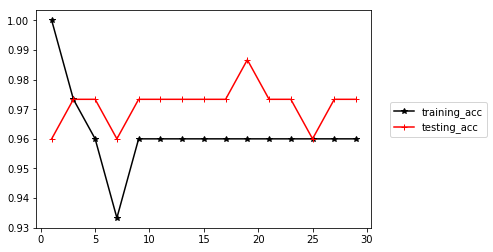

In [30]:
plt.plot(np.arange(1,30,2),acc_train,'k-*',label='training_acc')
plt.plot(np.arange(1,30,2),acc_test,'r-+',label='testing_acc')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

In [31]:
px1 = np.arange(4, 8, 0.1)
px2 = np.arange(2,4.5,0.05)
xv, yv = np.meshgrid(px1, px2)
iris_gridFeatures = pd.DataFrame(np.column_stack((xv.flatten(),yv.flatten())),columns=['Sepal_length', 'Sepal_width'])
print(iris_gridFeatures.head(10))

   Sepal_length  Sepal_width
0           4.0          2.0
1           4.1          2.0
2           4.2          2.0
3           4.3          2.0
4           4.4          2.0
5           4.5          2.0
6           4.6          2.0
7           4.7          2.0
8           4.8          2.0
9           4.9          2.0


# Exercise 2: Expected prediction error

We can compute, for a grid of threshold values, the average
prediction error for each of these threshold values, as:
\begin{eqnarray*}
\textrm{EPE}(f_t) & = &  P(X < t \mid Y = 1)/2 +  P(X
\geq t \mid Y = 0)/2 \\
%& = & 0.5 \int_{-\infty}^t \phi_3(t) \mathrm{d} t + 0.5 \int_t^{\infty} \phi_0(t) \mathrm{d} t \\
& = & (\Phi_3(t) + 1 - \Phi_0(t))/2.\\
& \text{because} & X | (Y=1) \sim N (3,1),X | (Y=0) \sim N (0,1)
\end{eqnarray*}
Note that $\Phi_{\mu}$ is the cumulative distribution function for the normal
distribution with mean $\mu$ and variance 1.

We can plot the theoretical EPE with:

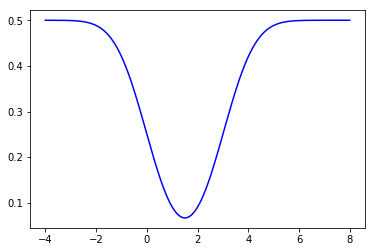

In [10]:
from scipy.stats import norm
def theoMisclas(t):
    return (norm.cdf(t,3,1)+1-norm.cdf(t))/2

thres = np.arange(-4, 8, 0.01)
theoEPE = theoMisclas(thres)
plt.figure()
plt.plot(thres,theoEPE,color='blue',label='Theoretical')

We can compute the optimal $\hat{t}$, as:
\begin{eqnarray*}
\hat{t} &=& \textrm{argmin}_t\textrm{EPE}(f_t) \\
& = &\textrm{argmin}_t (\Phi_3(t) + 1 - \Phi_0(t))/2.\\
& = &\textrm{argmin}_t\left(\textrm{erf}\left(\frac{t-3}{\sqrt{2}}\right)-\textrm{erf}\left(\frac{t}{\sqrt{2}}\right)\right)\\
\end{eqnarray*}
Take the derivative of the above function and set it to $0$, so $f(t|3,1)=f(t|0,1)->(t-3)^2=t^2->t=1.5$

The simulation can be done as follows:

In [11]:
import numpy as np
N = 1000
Y = np.random.binomial(1, 0.5 ,N) # Random number generated from Binomial distribution
mu = 3*Y
X = np.random.normal(mu,1,N)

This is just one way, where we use that <b>random.normal</b> take a
vector as mean values.

The density plot shows the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups.

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


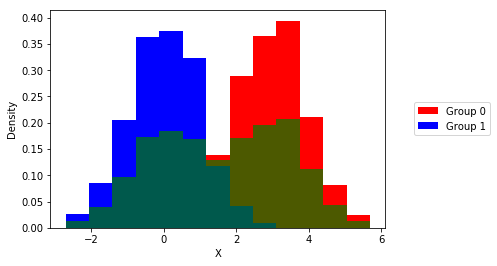

In [13]:
bins = 13
plt.hist(X[Y==1], bins=bins,normed=True, color='r', alpha=1.0, label='Group 0',range = (np.min(X),np.max(X)))
plt.hist(X[Y==0], bins=bins,normed=True, color='b', alpha=1.0, label='Group 1',range = (np.min(X),np.max(X)))
plt.hist(X,bins=bins,normed=True, color='g', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Density')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

We compute the empirical error function as:

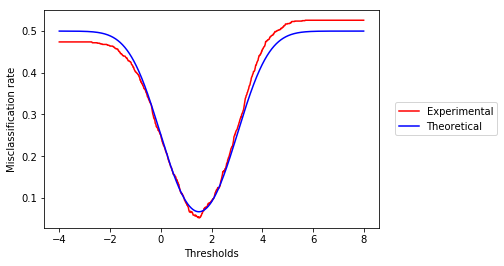

In [14]:
from scipy.stats import norm
def aveMisclas(t):
    return np.mean((X >= t) != Y)


thres = np.arange(-4, 8, 0.01)
aveMisclasFunc = np.vectorize(aveMisclas)
empEPE = aveMisclasFunc(thres)

plt.figure()
plt.plot(thres, empEPE,color='red',label='Experimental')
plt.plot(thres,theoEPE,color='blue',label='Theoretical')
plt.xlabel('Thresholds')
plt.ylabel('Misclassification rate')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

## Exercise 3 (optional): Analysis of Data on Hepatitis C

In [15]:
import pandas as pd
HepCevol = pd.read_csv("HepCevol.txt",delimiter=' ')
HepCevol.head(5)

,segment,pos,nucleotide.77,nucleotide.90
1,A,42,G,A
2,A,275,C,T
3,A,348,C,T
4,A,447,A,G
5,A,556,G,A


In [16]:
HepCevol.loc[HepCevol['segment']=='B']

,segment,pos,nucleotide.77,nucleotide.90
79,B,102,T,C
80,B,105,G,T
81,B,150,T,C
82,B,190,C,T
83,B,196,G,A
84,B,198,T,A
85,B,201,T,C
86,B,206,A,G
87,B,303,T,C
88,B,403,C,T


First we write a function that, given $\alpha$ and time value, returns the matrix of
transition probabilities. The default is time = 1 to make the function work even if we don't
specify time.

In [17]:
def tpJC(alpha,time=1):
    z = -4*alpha*time
    xx = 0.25+0.75*np.exp(z)
    xy = 0.25-0.25*np.exp(z)
    tp = np.ones((4,4))*xy
    np.fill_diagonal(tp,xx)
    return tp

In [18]:
M = tpJC(0.0005,1)
print(M)

[[9.98501499e-01 4.99500333e-04 4.99500333e-04 4.99500333e-04]
 [4.99500333e-04 9.98501499e-01 4.99500333e-04 4.99500333e-04]
 [4.99500333e-04 4.99500333e-04 9.98501499e-01 4.99500333e-04]
 [4.99500333e-04 4.99500333e-04 4.99500333e-04 9.98501499e-01]]


To calculate the log likelihood function (mll) we introduce $n_{x,y}$ as the number of observed mutations of $x$ to $y$, and rewrite 
\begin{eqnarray*}
 l(t, p, \alpha) &=& log \mathcal L (t,p,a) \\
 &=& log {\sum_{x,y}}p(x)^{n_{xy}}*P_\alpha^t(x,y)^{n_{xy}}\\
 &=& log {\sum_{x,y}}p(x)^{n_{xy}}+ log{\sum_{x,y}}P_\alpha^t(x,y)^{n_{xy}} \\
 &=& log {\sum_{x,y}}p(x)^{n_{xy}}+ n_{xy}log{\sum_{x,y}}P_\alpha^t(x,y).
\end{eqnarray*}
Observe that the first term depends upon $p$ only, which we assume to be constant and the second term on $ \alpha$ ($t=13$ in $\texttt{HepCevol}$) only. To find
the MLE we only need to minimize the second term. Hence, we have:


In [19]:
def mll(alpha,mutation_counts,time=1,tp = tpJC):
    return sum((np.log(tp(alpha,time))*mutation_counts).flatten())

To estimate $\alpha$ using MLE we need to minimize the above log likelood by taking its derivative on $\alpha$. 
$$ \sum_{x\neq y}\frac{n_{x,y}}{P_\alpha^t(x,y)}(-\frac{1}{4}e^{-4\alpha t}(-4t))+\sum_{x}\frac{n_{x,x}}{P_\alpha^t(x,x)}(\frac{3}{4}e^{-4\alpha t}(-4t))=0$$
Using basic calculus, we obtain the unique maximum likelihood estimator to $\hat \alpha$ given as
$$ \hat \alpha = \frac{1}{4t} \log \frac{3(n_1+n_2)}{3 n_1 - n_2} = \frac{1}{4t} \log \frac{3n}{3 n_1 - n_2}$$
with $n_1 = \sum_x n_{x,x}$ and $n_2 = \sum_{x \neq y} n_{x,y}$ and if and only if $3n_1>n_2.$

We implement the computation of the MLE for the given probabilistic model based on a tabulation of the
transitions.

In [20]:
def alphahat(mutation_counts,t):
    n1 = sum(np.diag(mutation_counts))
    n2 = sum(mutation_counts.flatten())-n1
    if 3*n1>n2:
        alpha = np.log(3*(n1+n2)/(3*n1-n2))/(4*t)
    else:
        alpha = -1 * np.inf
    return alpha

Then we tabulate our data for the three segments and compute the MLEs.

Segment A, the diagnoal terms are $[470, 761, 746, 555]$

In [21]:
xSegA = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegA[i,j]= len(HepCevol[((HepCevol['segment']=='A')& (HepCevol['nucleotide.77']==nucleotide[i])) & (HepCevol['nucleotide.90']==nucleotide[j])])
np.fill_diagonal(xSegA, [470, 761, 746, 555])
print('xSegA:',xSegA)
alphahat_A = alphahat(xSegA,13)
print('alphahat_A:',alphahat_A)

xSegA: [[470.   1.  11.   1.]
 [  4. 761.   1.  20.]
 [ 13.   3. 746.   1.]
 [  3.  19.   1. 555.]]
alphahat_A: 0.0007819685550139502


SegmentB, the diagnoal terms are $[252, 389, 347, 271]$

In [22]:
xSegB = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegB[i,j]= len(HepCevol[((HepCevol['segment']=='B')& (HepCevol['nucleotide.77']==nucleotide[i])) & (HepCevol['nucleotide.90']==nucleotide[j])])
np.fill_diagonal(xSegB, [252, 389, 347, 271])
print('xSegB:',xSegB)
alphahat_B = alphahat(xSegB,13)
print('alphahat_B:',alphahat_B)


xSegB: [[252.   0.   5.   0.]
 [  1. 389.   0.   8.]
 [  1.   1. 347.   1.]
 [  2.   6.   0. 271.]]
alphahat_B: 0.0005058358229211719


SegmentC, the diagnoal terms are $[230, 299, 282, 198]$

In [23]:
xSegC = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegC[i,j]= len(HepCevol[((HepCevol['segment']=='C')& (HepCevol['nucleotide.77']==nucleotide[i])) & (HepCevol['nucleotide.90']==nucleotide[j])])
np.fill_diagonal(xSegC, [230, 299, 282, 198])
print('xSegC:',xSegC)
alphahat_C = alphahat(xSegC,13)
print('alphahat_C:',alphahat_C)

xSegC: [[230.   1.   2.   0.]
 [  1. 299.   2.   5.]
 [  4.   0. 282.   0.]
 [  1.   3.   1. 198.]]
alphahat_C: 0.0005049392598775057


Make a Plot

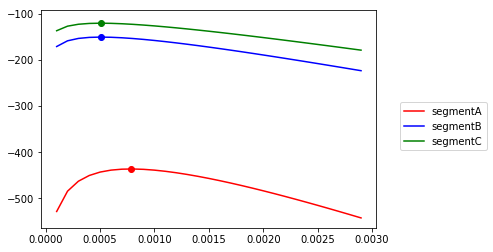

In [24]:
alphaCandi = np.arange(0.0001, 0.003, 0.0001)
mllExpA = np.zeros(alphaCandi.shape)
mllExpB = np.zeros(alphaCandi.shape)
mllExpC = np.zeros(alphaCandi.shape)
for i in range(alphaCandi.shape[0]):
    mllExpA[i]=mll(alphaCandi[i],xSegA,time=13)
    mllExpB[i]=mll(alphaCandi[i],xSegB,time=13)
    mllExpC[i]=mll(alphaCandi[i],xSegC,time=13)
plt.figure()
plt.plot(alphaCandi,mllExpA,color='red',label='segmentA')
plt.scatter(alphahat_A,mll(alphahat_A,xSegA,time=13),color='red')
plt.plot(alphaCandi,mllExpB,color='blue',label='segmentB')
plt.scatter(alphahat_B,mll(alphahat_B,xSegB,time=13),color='blue')
plt.plot(alphaCandi,mllExpC,color='green',label='segmentC')
plt.scatter(alphahat_C,mll(alphahat_C,xSegC,time=13),color='green')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))